# 1 Introduction

## 1.1 Background

Canberra is the capital city of Australia. Canberra approximately has 8 districts with varying number of suburbs. The city is located at the northern end of the Australian Capital Territory (ACT), 280 km (170 mi) south-west of Sydney, and 660 km (410 mi) north-east of Melbourne. With a population over 403,057, it is Australia's largest inland city and the eighth largest city overall.

According to [Australia population site](http://www.population.net.au/canberra-population/), Canberra population can reach 410,199 by end of June of 2019.

In order to accommodate/attract new dwellers, Canberra is expanding its infrastructure by adding new transports and new suburbs.

## 1.2 Problem

With increasing infrastructure and introduction to new suburbs Canberra it becomes a challenge for new residents to figure out which suburb is safe to live and have decent amenities. For the investors it is even more critical to invest in a property that have good suburb profile so that they can see a decent profit in the future. This case study attempts to analyze different suburbs based on various parameters that can help new,old residents and investor to make safe choice for living.

## 1.3 Interest

The case study will be helpful or interesting for:
* the existing residents of Canberra to understand suburb profiles better 
* the families, students or person who is planning to move to Canberra 
* the investors who is looking to invest in Canberra. 

To certain extend it can also attract real estate dealers for determining property price. Being a Canberra resident, I am also intrested to see which suburb is with minimal crime with decent amenities.

## 1.4 Assumptions

* Safety is considered as primary requirement for analyzing suburb profile.
* Based on 1.5km as walking distance, nearby venues are assessed.

## 1.5 Limitation

* Crime stats are only available from 2014 and hence crime rate comparison is made from 2014.
* New suburbs may have limited data to assess.

## 1.6 Case study approach

In order to understand suburb profile, the case study is conducted in two phase:

* Phase 1: Crime rate analysis
* Phase 2: Amenities analysis

Since safety is primary requirement, the study is split into two. First safe districts are identified and then amenities are assessed for safe district suburb.

# Data

* To analyze the crime stats, crime rate data is sourced from [ACT Police website](https://policenews.act.gov.au/crime-statistics-and-data/crime-statistics/download).
* To analyze various amenities, data is sourced from [FourSquare API](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=2ahUKEwj59cm9oc7gAhVKf30KHWVCDSEQFjAAegQIABAC&url=https%3A%2F%2Fdeveloper.foursquare.com%2F&usg=AOvVaw3DzSLcL2tSGGv_ErgcAjEY).
* To plot the map, latitude and longitudes are required. These are obtained from python geopy packages.

The crime data source from ACT police website is in the form of excel sheet and hence data is converted to CSV format for easier modelling. Two types of files were created:

* [District Suburb wise crime total count](https://github.com/radhikakannan/Capstone/blob/master/data/Canberra_crime_stats.csv) - This contains district suburb wise crime total starting from year 2014 till 2017. The data available for each quarter per year.
* [District Suburb wise crimes](https://github.com/radhikakannan/Capstone/blob/master/data/act_suburb_crime_data.csv) - This file contains suburb wise crimes that took place from year 2014 till 2017. The data available for each quarter per year.

Amenities data retrived from Foursquare API and are in JSON format and hence no data manipulation is done. Top 20 location are retrieved using search API with radius as 1500m.

# Data Collection

* Canberra suburbs are scraped from [wiki](https://en.wikipedia.org/wiki/Suburbs_of_Canberra)
* Crime rate can be obtained from ACT police [website](https://policenews.act.gov.au/crime-statistics-and-data/crime-statistics/download).
* Nearby venues are reterived from FourSquare API.
* House profiles are reterived from [Domain APIs](https://developer.domain.com.au/docs/getting-started)

**Import Libraries**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.colors as colors1

# import k-means from clustering stage
from sklearn.cluster import KMeans

import requests #library to send HTTP requests

print('Libraries imported.')

Libraries imported.


**Data Collection 1: Get suburb wise crime data from github**

In [2]:
!wget -q -O 'ccs.csv' https://raw.githubusercontent.com/radhikakannan/Capstone/master/data/Canberra_crime_stats.csv
print('Data downloaded!')

Data downloaded!


In [3]:
ccs_df = pd.read_csv('ccs.csv') #read csv
print('csv read')

csv read


In [4]:
ccs_df.head() #view df

,District,Suburb,2014 Jan-Mar,2014 Q2 Apr-Jun,2014 Q3 Jul-Sep,2014 Q4 Oct-Dec,2015 Q1 Jan-Mar,2015 Q2 Apr-Jun,2015 Q3 Jul-Sep,2015 Q4 Oct-Dec,2016 Q1 Jan-Mar,2016 Q2 Apr-Jun,2016 Q3 Jul-Sep,2016 Q4 Oct-Dec,2017 Q1 Jan-Mar,2017 Q2 Apr-Jun,2017 Q3 Jul-Sep,2017 Q4 Oct-Dec,2018 Q1 Jan-Mar,2018 Q2 Apr-Jun
0,Belconnen,ARANDA,140,151,169,185,128,98,126,156,117,101,158,144,127,157,151,277,52,42
1,Belconnen,BELCONNEN,656,585,587,677,686,660,581,741,602,636,682,713,741,816,591,641,492,554
2,Belconnen,BRUCE,203,314,259,275,283,244,345,238,220,259,255,239,226,332,303,261,161,110
3,Belconnen,CHARNWOOD,95,69,73,73,85,69,98,97,60,107,106,117,97,91,96,70,69,78
4,Belconnen,COOK,41,60,158,90,60,83,38,55,42,46,135,77,81,67,127,106,38,34


**Data collection 2: Get different crimes per suburb**

In [5]:
!wget -q -O 'suburbCrimes.csv' https://raw.githubusercontent.com/radhikakannan/Capstone/master/data/act_suburb_crime_data.csv
print('Data downloaded!')

Data downloaded!


In [6]:
sub_crime_df = pd.read_csv('suburbCrimes.csv') #read csv
print('csv read')

csv read


In [7]:
sub_crime_df.head()

,District,Suburb,2014 Q1 1 Homicide,2014 Q1 2a Assault - FV,2014 Q1 2b Assault - Non-FV,2014 Q1 3 Sexual Assault,2014 Q1 4 Other offences against a person,2014 Q1 5a Robbery - armed,2014 Q1 5b Robbery - other,2014 Q1 6a Burglary dwellings,2014 Q1 6b Burglary shops,2014 Q1 6c Burglary other,2014 Q1 7 Motor vehicle theft theft,2014 Q1 8 Property damage,2014 Q1 9 Other offences,2014 Q1 91a TINs Speeding,2014 Q1 91b TINs Mobile Use,2014 Q1 91c TINs Seatbelts,2014 Q1 91d TINs Other,2014 Q1 92 Theft (excluding Motor Vehicles),2014 Q2 1 Homicide,2014 Q2 2a Assault - FV,2014 Q2 2b Assault - Non-FV,2014 Q2 3 Sexual Assault,2014 Q2 4 Other offences against a person,2014 Q2 5a Robbery - armed,2014 Q2 5b Robbery - other,2014 Q2 6a Burglary dwellings,2014 Q2 6b Burglary shops,2014 Q2 6c Burglary other,2014 Q2 7 Motor vehicle theft theft,2014 Q2 8 Property damage,2014 Q2 9 Other offences,2014 Q2 91a TINs Speeding,2014 Q2 91b TINs Mobile Use,2014 Q2 91c TINs Seatbelts,2014 Q2 91d TINs Other,2014 Q2 92 Theft (excluding Motor Vehicles),2014 Q3 1 Homicide,2014 Q3 2a Assault - FV,2014 Q3 2b Assault - Non-FV,2014 Q3 3 Sexual Assault,2014 Q3 4 Other offences against a person,2014 Q3 5a Robbery - armed,2014 Q3 5b Robbery - other,2014 Q3 6a Burglary dwellings,2014 Q3 6b Burglary shops,2014 Q3 6c Burglary other,2014 Q3 7 Motor vehicle theft theft,2014 Q3 8 Property damage,2014 Q3 9 Other offences,2014 Q3 91a TINs Speeding,2014 Q3 91b TINs Mobile Use,2014 Q3 91c TINs Seatbelts,2014 Q3 91d TINs Other,2014 Q3 92 Theft (excluding Motor Vehicles),2014 Q4 1 Homicide,2014 Q4 2a Assault - FV,2014 Q4 2b Assault - Non-FV,2014 Q4 3 Sexual Assault,2014 Q4 4 Other offences against a person,2014 Q4 5a Robbery - armed,2014 Q4 5b Robbery - other,2014 Q4 6a Burglary dwellings,2014 Q4 6b Burglary shops,2014 Q4 6c Burglary other,2014 Q4 7 Motor vehicle theft theft,2014 Q4 8 Property damage,2014 Q4 9 Other offences,2014 Q4 91a TINs Speeding,2014 Q4 91b TINs Mobile Use,2014 Q4 91c TINs Seatbelts,2014 Q4 91d TINs Other,2014 Q4 92 Theft (excluding Motor Vehicles),2015 Q1 1 Homicide,2015 Q1 2a Assault - FV,2015 Q1 2b Assault - Non-FV,2015 Q1 3 Sexual Assault,2015 Q1 4 Other offences against a person,2015 Q1 5a Robbery - armed,2015 Q1 5b Robbery - other,2015 Q1 6a Burglary dwellings,2015 Q1 6b Burglary shops,2015 Q1 6c Burglary other,2015 Q1 7 Motor vehicle theft,2015 Q1 8 Property damage,2015 Q1 9 Other offences,2015 Q1 91a TINs Speeding,2015 Q1 91b TINs Mobile Use,2015 Q1 91c TINs Seatbelts,2015 Q1 91d TINs Other,2015 Q1 92 Theft (excluding Motor Vehicles),2015 Q2 1 Homicide,2015 Q2 2a Assault - FV,2015 Q2 2b Assault - Non-FV,2015 Q2 3 Sexual Assault,2015 Q2 4 Other offences against a person,2015 Q2 5a Robbery - armed,2015 Q2 5b Robbery - other,2015 Q2 6a Burglary dwellings,2015 Q2 6b Burglary shops,2015 Q2 6c Burglary other,2015 Q2 7 Motor vehicle theft,2015 Q2 8 Property damage,2015 Q2 9 Other offences,2015 Q2 91a TINs Speeding,2015 Q2 91b TINs Mobile Use,2015 Q2 91c TINs Seatbelts,2015 Q2 91d TINs Other,2015 Q2 92 Theft (excluding Motor Vehicles),2015 Q3 1 Homicide,2015 Q3 2a Assault - FV,2015 Q3 2b Assault - Non-FV,2015 Q3 3 Sexual Assault,2015 Q3 4 Other offences against a person,2015 Q3 5a Robbery - armed,2015 Q3 5b Robbery - other,2015 Q3 6a Burglary dwellings,2015 Q3 6b Burglary shops,2015 Q3 6c Burglary other,2015 Q3 7 Motor vehicle theft,2015 Q3 8 Property damage,2015 Q3 9 Other offences,2015 Q3 91a TINs Speeding,2015 Q3 91b TINs Mobile Use,2015 Q3 91c TINs Seatbelts,2015 Q3 91d TINs Other,2015 Q3 92 Theft (excluding Motor Vehicles),2015 Q4 1 Homicide,2015 Q4 2a Assault - FV,2015 Q4 2b Assault - Non-FV,2015 Q4 3 Sexual Assault,2015 Q4 4 Other offences against a person,2015 Q4 5a Robbery - armed,2015 Q4 5b Robbery - other,2015 Q4 6a Burglary dwellings,2015 Q4 6b Burglary shops,2015 Q4 6c Burglary other,2015 Q4 7 Motor vehicle theft,2015 Q4 8 Property damage,2015 Q4 9 Other offences,2015 Q4 91a TINs Speeding,2015 Q4 91b TINs Mobile Use,2015 Q4 91c TINs Seatbelts,20

In [8]:
#check ccs_df and sub_crime_df have same number of rows
print('ccs_df:', ccs_df.shape)
print('sub_crime_df:', sub_crime_df.shape)

ccs_df: (120, 20)
sub_crime_df: (120, 326)


**Data Collection 3: Get Latitude/Longitude for the suburbs in ccs_df as both dataset have same rows**

In [9]:
# create empty dataframe to store lat/long for act suburbs
# define the dataframe columns
column_names = ['Suburb','Latitude','Longitude'] 

# instantiate the dataframe
latlon = pd.DataFrame(columns=column_names)
latlon.head()

,Suburb,Latitude,Longitude


In [10]:
geolocator = Nominatim(user_agent="act_explorer")

for indices,row in ccs_df.iterrows():
    address = row['Suburb'] + ", ACT"
    location = geolocator.geocode(address)
    if location==None:
        print(row['Suburb'])
    else:
        latlon = latlon.append({'Suburb':row['Suburb'],'Latitude':location.latitude,'Longitude':location.longitude},ignore_index=True)
latlon.head()

KINLYSIDE


,Suburb,Latitude,Longitude
0,ARANDA,-35.258055,149.080426
1,BELCONNEN,-35.227434,149.043145
2,BRUCE,-35.245352,149.091633
3,CHARNWOOD,-35.200178,149.034136
4,COOK,-35.260103,149.066366


# Data Understanding

* Kinlyside is a suburb for which latitude and longitude could not be reterived. Upon research it is understood that suburb is undeveloped and there are recommendations to make it as a nature reserve. Since this is not suitable for living we can exclude from our dataset.

* Year 2018 does not have enough data and hence can be removed for better results.

* The data for ccs_df need to be aggregated year wise so that modeling becomes easier and column names need to reflect correct name.

* The data for sub_crime_df requires aggregation crime wise and column header need to be changed for easy modelling.

* Merge the datasets to get meaningful conclusions

# Data Preparation

**Data preparation 1: Sum the crime stats for each year in ccs_df**

In [11]:
ccs_df['2014'] = ccs_df['2014 Jan-Mar'] + ccs_df['2014 Q2 Apr-Jun'] + ccs_df['2014 Q3 Jul-Sep'] + ccs_df['2014 Q4 Oct-Dec'] 
ccs_df['2015'] = ccs_df['2015 Q1 Jan-Mar'] + ccs_df['2015 Q2 Apr-Jun'] + ccs_df['2015 Q3 Jul-Sep'] + ccs_df['2015 Q4 Oct-Dec'] 
ccs_df['2016'] = ccs_df['2016 Q1 Jan-Mar'] + ccs_df['2016 Q2 Apr-Jun'] + ccs_df['2016 Q3 Jul-Sep'] + ccs_df['2016 Q4 Oct-Dec'] 
ccs_df['2017'] = ccs_df['2017 Q1 Jan-Mar'] + ccs_df['2017 Q2 Apr-Jun'] + ccs_df['2017 Q3 Jul-Sep'] + ccs_df['2017 Q4 Oct-Dec'] 
#ccs_df['2018'] = ccs_df['2018 Q1 Jan-Mar'] + ccs_df['2018 Q2 Apr-Jun'] 
ccs_df.drop(['2014 Jan-Mar', '2014 Q2 Apr-Jun', '2014 Q3 Jul-Sep','2014 Q4 Oct-Dec'], axis=1, inplace=True)
ccs_df.drop(['2015 Q1 Jan-Mar', '2015 Q2 Apr-Jun', '2015 Q3 Jul-Sep','2015 Q4 Oct-Dec'], axis=1, inplace=True)
ccs_df.drop(['2016 Q1 Jan-Mar', '2016 Q2 Apr-Jun', '2016 Q3 Jul-Sep','2016 Q4 Oct-Dec'], axis=1, inplace=True)
ccs_df.drop(['2017 Q1 Jan-Mar', '2017 Q2 Apr-Jun', '2017 Q3 Jul-Sep','2017 Q4 Oct-Dec'], axis=1, inplace=True)
#since only two quater data available, we will drop 2018
ccs_df.drop(['2018 Q1 Jan-Mar', '2018 Q2 Apr-Jun'], axis=1, inplace=True)

ccs_df.head()

,District,Suburb,2014,2015,2016,2017
0,Belconnen,ARANDA,645,508,520,712
1,Belconnen,BELCONNEN,2505,2668,2633,2789
2,Belconnen,BRUCE,1051,1110,973,1122
3,Belconnen,CHARNWOOD,310,349,390,354
4,Belconnen,COOK,349,236,300,381


In [12]:
print(ccs_df.shape)
print(latlon.shape)

(120, 6)
(119, 3)


**Data preparation 2: Merge based on Suburb as one of the suburb lat/long not available**

In [13]:
#merging based on suburb so that Kinlyside is removed automatically. Only merges where suburbs match
ccs_lat_long_df = pd.merge(ccs_df, latlon, on='Suburb', how='inner')
ccs_lat_long_df.head()

,District,Suburb,2014,2015,2016,2017,Latitude,Longitude
0,Belconnen,ARANDA,645,508,520,712,-35.258055,149.080426
1,Belconnen,BELCONNEN,2505,2668,2633,2789,-35.227434,149.043145
2,Belconnen,BRUCE,1051,1110,973,1122,-35.245352,149.091633
3,Belconnen,CHARNWOOD,310,349,390,354,-35.200178,149.034136
4,Belconnen,COOK,349,236,300,381,-35.260103,149.066366


**Data preparation 3: Prepare sub_crime_df data for modelling**

In [14]:
sub_crime_df.head()

,District,Suburb,2014 Q1 1 Homicide,2014 Q1 2a Assault - FV,2014 Q1 2b Assault - Non-FV,2014 Q1 3 Sexual Assault,2014 Q1 4 Other offences against a person,2014 Q1 5a Robbery - armed,2014 Q1 5b Robbery - other,2014 Q1 6a Burglary dwellings,2014 Q1 6b Burglary shops,2014 Q1 6c Burglary other,2014 Q1 7 Motor vehicle theft theft,2014 Q1 8 Property damage,2014 Q1 9 Other offences,2014 Q1 91a TINs Speeding,2014 Q1 91b TINs Mobile Use,2014 Q1 91c TINs Seatbelts,2014 Q1 91d TINs Other,2014 Q1 92 Theft (excluding Motor Vehicles),2014 Q2 1 Homicide,2014 Q2 2a Assault - FV,2014 Q2 2b Assault - Non-FV,2014 Q2 3 Sexual Assault,2014 Q2 4 Other offences against a person,2014 Q2 5a Robbery - armed,2014 Q2 5b Robbery - other,2014 Q2 6a Burglary dwellings,2014 Q2 6b Burglary shops,2014 Q2 6c Burglary other,2014 Q2 7 Motor vehicle theft theft,2014 Q2 8 Property damage,2014 Q2 9 Other offences,2014 Q2 91a TINs Speeding,2014 Q2 91b TINs Mobile Use,2014 Q2 91c TINs Seatbelts,2014 Q2 91d TINs Other,2014 Q2 92 Theft (excluding Motor Vehicles),2014 Q3 1 Homicide,2014 Q3 2a Assault - FV,2014 Q3 2b Assault - Non-FV,2014 Q3 3 Sexual Assault,2014 Q3 4 Other offences against a person,2014 Q3 5a Robbery - armed,2014 Q3 5b Robbery - other,2014 Q3 6a Burglary dwellings,2014 Q3 6b Burglary shops,2014 Q3 6c Burglary other,2014 Q3 7 Motor vehicle theft theft,2014 Q3 8 Property damage,2014 Q3 9 Other offences,2014 Q3 91a TINs Speeding,2014 Q3 91b TINs Mobile Use,2014 Q3 91c TINs Seatbelts,2014 Q3 91d TINs Other,2014 Q3 92 Theft (excluding Motor Vehicles),2014 Q4 1 Homicide,2014 Q4 2a Assault - FV,2014 Q4 2b Assault - Non-FV,2014 Q4 3 Sexual Assault,2014 Q4 4 Other offences against a person,2014 Q4 5a Robbery - armed,2014 Q4 5b Robbery - other,2014 Q4 6a Burglary dwellings,2014 Q4 6b Burglary shops,2014 Q4 6c Burglary other,2014 Q4 7 Motor vehicle theft theft,2014 Q4 8 Property damage,2014 Q4 9 Other offences,2014 Q4 91a TINs Speeding,2014 Q4 91b TINs Mobile Use,2014 Q4 91c TINs Seatbelts,2014 Q4 91d TINs Other,2014 Q4 92 Theft (excluding Motor Vehicles),2015 Q1 1 Homicide,2015 Q1 2a Assault - FV,2015 Q1 2b Assault - Non-FV,2015 Q1 3 Sexual Assault,2015 Q1 4 Other offences against a person,2015 Q1 5a Robbery - armed,2015 Q1 5b Robbery - other,2015 Q1 6a Burglary dwellings,2015 Q1 6b Burglary shops,2015 Q1 6c Burglary other,2015 Q1 7 Motor vehicle theft,2015 Q1 8 Property damage,2015 Q1 9 Other offences,2015 Q1 91a TINs Speeding,2015 Q1 91b TINs Mobile Use,2015 Q1 91c TINs Seatbelts,2015 Q1 91d TINs Other,2015 Q1 92 Theft (excluding Motor Vehicles),2015 Q2 1 Homicide,2015 Q2 2a Assault - FV,2015 Q2 2b Assault - Non-FV,2015 Q2 3 Sexual Assault,2015 Q2 4 Other offences against a person,2015 Q2 5a Robbery - armed,2015 Q2 5b Robbery - other,2015 Q2 6a Burglary dwellings,2015 Q2 6b Burglary shops,2015 Q2 6c Burglary other,2015 Q2 7 Motor vehicle theft,2015 Q2 8 Property damage,2015 Q2 9 Other offences,2015 Q2 91a TINs Speeding,2015 Q2 91b TINs Mobile Use,2015 Q2 91c TINs Seatbelts,2015 Q2 91d TINs Other,2015 Q2 92 Theft (excluding Motor Vehicles),2015 Q3 1 Homicide,2015 Q3 2a Assault - FV,2015 Q3 2b Assault - Non-FV,2015 Q3 3 Sexual Assault,2015 Q3 4 Other offences against a person,2015 Q3 5a Robbery - armed,2015 Q3 5b Robbery - other,2015 Q3 6a Burglary dwellings,2015 Q3 6b Burglary shops,2015 Q3 6c Burglary other,2015 Q3 7 Motor vehicle theft,2015 Q3 8 Property damage,2015 Q3 9 Other offences,2015 Q3 91a TINs Speeding,2015 Q3 91b TINs Mobile Use,2015 Q3 91c TINs Seatbelts,2015 Q3 91d TINs Other,2015 Q3 92 Theft (excluding Motor Vehicles),2015 Q4 1 Homicide,2015 Q4 2a Assault - FV,2015 Q4 2b Assault - Non-FV,2015 Q4 3 Sexual Assault,2015 Q4 4 Other offences against a person,2015 Q4 5a Robbery - armed,2015 Q4 5b Robbery - other,2015 Q4 6a Burglary dwellings,2015 Q4 6b Burglary shops,2015 Q4 6c Burglary other,2015 Q4 7 Motor vehicle theft,2015 Q4 8 Property damage,2015 Q4 9 Other offences,2015 Q4 91a TINs Speeding,2015 Q4 91b TINs Mobile Use,2015 Q4 91c TINs Seatbelts,20

In [15]:
#Remove white space from District and Suburb
sub_crime_df['District'] = sub_crime_df['District'].str.strip()
sub_crime_df['Suburb'] = sub_crime_df['Suburb'].str.strip()
sub_crime_df.head()

,District,Suburb,2014 Q1 1 Homicide,2014 Q1 2a Assault - FV,2014 Q1 2b Assault - Non-FV,2014 Q1 3 Sexual Assault,2014 Q1 4 Other offences against a person,2014 Q1 5a Robbery - armed,2014 Q1 5b Robbery - other,2014 Q1 6a Burglary dwellings,2014 Q1 6b Burglary shops,2014 Q1 6c Burglary other,2014 Q1 7 Motor vehicle theft theft,2014 Q1 8 Property damage,2014 Q1 9 Other offences,2014 Q1 91a TINs Speeding,2014 Q1 91b TINs Mobile Use,2014 Q1 91c TINs Seatbelts,2014 Q1 91d TINs Other,2014 Q1 92 Theft (excluding Motor Vehicles),2014 Q2 1 Homicide,2014 Q2 2a Assault - FV,2014 Q2 2b Assault - Non-FV,2014 Q2 3 Sexual Assault,2014 Q2 4 Other offences against a person,2014 Q2 5a Robbery - armed,2014 Q2 5b Robbery - other,2014 Q2 6a Burglary dwellings,2014 Q2 6b Burglary shops,2014 Q2 6c Burglary other,2014 Q2 7 Motor vehicle theft theft,2014 Q2 8 Property damage,2014 Q2 9 Other offences,2014 Q2 91a TINs Speeding,2014 Q2 91b TINs Mobile Use,2014 Q2 91c TINs Seatbelts,2014 Q2 91d TINs Other,2014 Q2 92 Theft (excluding Motor Vehicles),2014 Q3 1 Homicide,2014 Q3 2a Assault - FV,2014 Q3 2b Assault - Non-FV,2014 Q3 3 Sexual Assault,2014 Q3 4 Other offences against a person,2014 Q3 5a Robbery - armed,2014 Q3 5b Robbery - other,2014 Q3 6a Burglary dwellings,2014 Q3 6b Burglary shops,2014 Q3 6c Burglary other,2014 Q3 7 Motor vehicle theft theft,2014 Q3 8 Property damage,2014 Q3 9 Other offences,2014 Q3 91a TINs Speeding,2014 Q3 91b TINs Mobile Use,2014 Q3 91c TINs Seatbelts,2014 Q3 91d TINs Other,2014 Q3 92 Theft (excluding Motor Vehicles),2014 Q4 1 Homicide,2014 Q4 2a Assault - FV,2014 Q4 2b Assault - Non-FV,2014 Q4 3 Sexual Assault,2014 Q4 4 Other offences against a person,2014 Q4 5a Robbery - armed,2014 Q4 5b Robbery - other,2014 Q4 6a Burglary dwellings,2014 Q4 6b Burglary shops,2014 Q4 6c Burglary other,2014 Q4 7 Motor vehicle theft theft,2014 Q4 8 Property damage,2014 Q4 9 Other offences,2014 Q4 91a TINs Speeding,2014 Q4 91b TINs Mobile Use,2014 Q4 91c TINs Seatbelts,2014 Q4 91d TINs Other,2014 Q4 92 Theft (excluding Motor Vehicles),2015 Q1 1 Homicide,2015 Q1 2a Assault - FV,2015 Q1 2b Assault - Non-FV,2015 Q1 3 Sexual Assault,2015 Q1 4 Other offences against a person,2015 Q1 5a Robbery - armed,2015 Q1 5b Robbery - other,2015 Q1 6a Burglary dwellings,2015 Q1 6b Burglary shops,2015 Q1 6c Burglary other,2015 Q1 7 Motor vehicle theft,2015 Q1 8 Property damage,2015 Q1 9 Other offences,2015 Q1 91a TINs Speeding,2015 Q1 91b TINs Mobile Use,2015 Q1 91c TINs Seatbelts,2015 Q1 91d TINs Other,2015 Q1 92 Theft (excluding Motor Vehicles),2015 Q2 1 Homicide,2015 Q2 2a Assault - FV,2015 Q2 2b Assault - Non-FV,2015 Q2 3 Sexual Assault,2015 Q2 4 Other offences against a person,2015 Q2 5a Robbery - armed,2015 Q2 5b Robbery - other,2015 Q2 6a Burglary dwellings,2015 Q2 6b Burglary shops,2015 Q2 6c Burglary other,2015 Q2 7 Motor vehicle theft,2015 Q2 8 Property damage,2015 Q2 9 Other offences,2015 Q2 91a TINs Speeding,2015 Q2 91b TINs Mobile Use,2015 Q2 91c TINs Seatbelts,2015 Q2 91d TINs Other,2015 Q2 92 Theft (excluding Motor Vehicles),2015 Q3 1 Homicide,2015 Q3 2a Assault - FV,2015 Q3 2b Assault - Non-FV,2015 Q3 3 Sexual Assault,2015 Q3 4 Other offences against a person,2015 Q3 5a Robbery - armed,2015 Q3 5b Robbery - other,2015 Q3 6a Burglary dwellings,2015 Q3 6b Burglary shops,2015 Q3 6c Burglary other,2015 Q3 7 Motor vehicle theft,2015 Q3 8 Property damage,2015 Q3 9 Other offences,2015 Q3 91a TINs Speeding,2015 Q3 91b TINs Mobile Use,2015 Q3 91c TINs Seatbelts,2015 Q3 91d TINs Other,2015 Q3 92 Theft (excluding Motor Vehicles),2015 Q4 1 Homicide,2015 Q4 2a Assault - FV,2015 Q4 2b Assault - Non-FV,2015 Q4 3 Sexual Assault,2015 Q4 4 Other offences against a person,2015 Q4 5a Robbery - armed,2015 Q4 5b Robbery - other,2015 Q4 6a Burglary dwellings,2015 Q4 6b Burglary shops,2015 Q4 6c Burglary other,2015 Q4 7 Motor vehicle theft,2015 Q4 8 Property damage,2015 Q4 9 Other offences,2015 Q4 91a TINs Speeding,2015 Q4 91b TINs Mobile Use,2015 Q4 91c TINs Seatbelts,20

**Data Preparation 4: Drop 2018 column as there is no years data**

In [16]:
#drop 2018 data as 12 months data is not available
sub_crime_df.drop(sub_crime_df.columns[290:],axis=1, inplace=True)

**Data Preparation 5: Get the average of homicide**

In [17]:
homicide_cols = [col for col in sub_crime_df.columns if 'Homicide' in col]
sub_crime_df['Homicide'] = sub_crime_df[homicide_cols].mean(axis=1)
#sub_crime_df.drop(cols,axis=1,inplace=True)
sub_crime_df.head()

,District,Suburb,2014 Q1 1 Homicide,2014 Q1 2a Assault - FV,2014 Q1 2b Assault - Non-FV,2014 Q1 3 Sexual Assault,2014 Q1 4 Other offences against a person,2014 Q1 5a Robbery - armed,2014 Q1 5b Robbery - other,2014 Q1 6a Burglary dwellings,2014 Q1 6b Burglary shops,2014 Q1 6c Burglary other,2014 Q1 7 Motor vehicle theft theft,2014 Q1 8 Property damage,2014 Q1 9 Other offences,2014 Q1 91a TINs Speeding,2014 Q1 91b TINs Mobile Use,2014 Q1 91c TINs Seatbelts,2014 Q1 91d TINs Other,2014 Q1 92 Theft (excluding Motor Vehicles),2014 Q2 1 Homicide,2014 Q2 2a Assault - FV,2014 Q2 2b Assault - Non-FV,2014 Q2 3 Sexual Assault,2014 Q2 4 Other offences against a person,2014 Q2 5a Robbery - armed,2014 Q2 5b Robbery - other,2014 Q2 6a Burglary dwellings,2014 Q2 6b Burglary shops,2014 Q2 6c Burglary other,2014 Q2 7 Motor vehicle theft theft,2014 Q2 8 Property damage,2014 Q2 9 Other offences,2014 Q2 91a TINs Speeding,2014 Q2 91b TINs Mobile Use,2014 Q2 91c TINs Seatbelts,2014 Q2 91d TINs Other,2014 Q2 92 Theft (excluding Motor Vehicles),2014 Q3 1 Homicide,2014 Q3 2a Assault - FV,2014 Q3 2b Assault - Non-FV,2014 Q3 3 Sexual Assault,2014 Q3 4 Other offences against a person,2014 Q3 5a Robbery - armed,2014 Q3 5b Robbery - other,2014 Q3 6a Burglary dwellings,2014 Q3 6b Burglary shops,2014 Q3 6c Burglary other,2014 Q3 7 Motor vehicle theft theft,2014 Q3 8 Property damage,2014 Q3 9 Other offences,2014 Q3 91a TINs Speeding,2014 Q3 91b TINs Mobile Use,2014 Q3 91c TINs Seatbelts,2014 Q3 91d TINs Other,2014 Q3 92 Theft (excluding Motor Vehicles),2014 Q4 1 Homicide,2014 Q4 2a Assault - FV,2014 Q4 2b Assault - Non-FV,2014 Q4 3 Sexual Assault,2014 Q4 4 Other offences against a person,2014 Q4 5a Robbery - armed,2014 Q4 5b Robbery - other,2014 Q4 6a Burglary dwellings,2014 Q4 6b Burglary shops,2014 Q4 6c Burglary other,2014 Q4 7 Motor vehicle theft theft,2014 Q4 8 Property damage,2014 Q4 9 Other offences,2014 Q4 91a TINs Speeding,2014 Q4 91b TINs Mobile Use,2014 Q4 91c TINs Seatbelts,2014 Q4 91d TINs Other,2014 Q4 92 Theft (excluding Motor Vehicles),2015 Q1 1 Homicide,2015 Q1 2a Assault - FV,2015 Q1 2b Assault - Non-FV,2015 Q1 3 Sexual Assault,2015 Q1 4 Other offences against a person,2015 Q1 5a Robbery - armed,2015 Q1 5b Robbery - other,2015 Q1 6a Burglary dwellings,2015 Q1 6b Burglary shops,2015 Q1 6c Burglary other,2015 Q1 7 Motor vehicle theft,2015 Q1 8 Property damage,2015 Q1 9 Other offences,2015 Q1 91a TINs Speeding,2015 Q1 91b TINs Mobile Use,2015 Q1 91c TINs Seatbelts,2015 Q1 91d TINs Other,2015 Q1 92 Theft (excluding Motor Vehicles),2015 Q2 1 Homicide,2015 Q2 2a Assault - FV,2015 Q2 2b Assault - Non-FV,2015 Q2 3 Sexual Assault,2015 Q2 4 Other offences against a person,2015 Q2 5a Robbery - armed,2015 Q2 5b Robbery - other,2015 Q2 6a Burglary dwellings,2015 Q2 6b Burglary shops,2015 Q2 6c Burglary other,2015 Q2 7 Motor vehicle theft,2015 Q2 8 Property damage,2015 Q2 9 Other offences,2015 Q2 91a TINs Speeding,2015 Q2 91b TINs Mobile Use,2015 Q2 91c TINs Seatbelts,2015 Q2 91d TINs Other,2015 Q2 92 Theft (excluding Motor Vehicles),2015 Q3 1 Homicide,2015 Q3 2a Assault - FV,2015 Q3 2b Assault - Non-FV,2015 Q3 3 Sexual Assault,2015 Q3 4 Other offences against a person,2015 Q3 5a Robbery - armed,2015 Q3 5b Robbery - other,2015 Q3 6a Burglary dwellings,2015 Q3 6b Burglary shops,2015 Q3 6c Burglary other,2015 Q3 7 Motor vehicle theft,2015 Q3 8 Property damage,2015 Q3 9 Other offences,2015 Q3 91a TINs Speeding,2015 Q3 91b TINs Mobile Use,2015 Q3 91c TINs Seatbelts,2015 Q3 91d TINs Other,2015 Q3 92 Theft (excluding Motor Vehicles),2015 Q4 1 Homicide,2015 Q4 2a Assault - FV,2015 Q4 2b Assault - Non-FV,2015 Q4 3 Sexual Assault,2015 Q4 4 Other offences against a person,2015 Q4 5a Robbery - armed,2015 Q4 5b Robbery - other,2015 Q4 6a Burglary dwellings,2015 Q4 6b Burglary shops,2015 Q4 6c Burglary other,2015 Q4 7 Motor vehicle theft,2015 Q4 8 Property damage,2015 Q4 9 Other offences,2015 Q4 91a TINs Speeding,2015 Q4 91b TINs Mobile Use,2015 Q4 91c TINs Seatbelts,20

**Drop the homicide cols**

In [18]:
sub_crime_df.drop(homicide_cols,axis=1,inplace=True)
sub_crime_df.head()

,District,Suburb,2014 Q1 2a Assault - FV,2014 Q1 2b Assault - Non-FV,2014 Q1 3 Sexual Assault,2014 Q1 4 Other offences against a person,2014 Q1 5a Robbery - armed,2014 Q1 5b Robbery - other,2014 Q1 6a Burglary dwellings,2014 Q1 6b Burglary shops,2014 Q1 6c Burglary other,2014 Q1 7 Motor vehicle theft theft,2014 Q1 8 Property damage,2014 Q1 9 Other offences,2014 Q1 91a TINs Speeding,2014 Q1 91b TINs Mobile Use,2014 Q1 91c TINs Seatbelts,2014 Q1 91d TINs Other,2014 Q1 92 Theft (excluding Motor Vehicles),2014 Q2 2a Assault - FV,2014 Q2 2b Assault - Non-FV,2014 Q2 3 Sexual Assault,2014 Q2 4 Other offences against a person,2014 Q2 5a Robbery - armed,2014 Q2 5b Robbery - other,2014 Q2 6a Burglary dwellings,2014 Q2 6b Burglary shops,2014 Q2 6c Burglary other,2014 Q2 7 Motor vehicle theft theft,2014 Q2 8 Property damage,2014 Q2 9 Other offences,2014 Q2 91a TINs Speeding,2014 Q2 91b TINs Mobile Use,2014 Q2 91c TINs Seatbelts,2014 Q2 91d TINs Other,2014 Q2 92 Theft (excluding Motor Vehicles),2014 Q3 2a Assault - FV,2014 Q3 2b Assault - Non-FV,2014 Q3 3 Sexual Assault,2014 Q3 4 Other offences against a person,2014 Q3 5a Robbery - armed,2014 Q3 5b Robbery - other,2014 Q3 6a Burglary dwellings,2014 Q3 6b Burglary shops,2014 Q3 6c Burglary other,2014 Q3 7 Motor vehicle theft theft,2014 Q3 8 Property damage,2014 Q3 9 Other offences,2014 Q3 91a TINs Speeding,2014 Q3 91b TINs Mobile Use,2014 Q3 91c TINs Seatbelts,2014 Q3 91d TINs Other,2014 Q3 92 Theft (excluding Motor Vehicles),2014 Q4 2a Assault - FV,2014 Q4 2b Assault - Non-FV,2014 Q4 3 Sexual Assault,2014 Q4 4 Other offences against a person,2014 Q4 5a Robbery - armed,2014 Q4 5b Robbery - other,2014 Q4 6a Burglary dwellings,2014 Q4 6b Burglary shops,2014 Q4 6c Burglary other,2014 Q4 7 Motor vehicle theft theft,2014 Q4 8 Property damage,2014 Q4 9 Other offences,2014 Q4 91a TINs Speeding,2014 Q4 91b TINs Mobile Use,2014 Q4 91c TINs Seatbelts,2014 Q4 91d TINs Other,2014 Q4 92 Theft (excluding Motor Vehicles),2015 Q1 2a Assault - FV,2015 Q1 2b Assault - Non-FV,2015 Q1 3 Sexual Assault,2015 Q1 4 Other offences against a person,2015 Q1 5a Robbery - armed,2015 Q1 5b Robbery - other,2015 Q1 6a Burglary dwellings,2015 Q1 6b Burglary shops,2015 Q1 6c Burglary other,2015 Q1 7 Motor vehicle theft,2015 Q1 8 Property damage,2015 Q1 9 Other offences,2015 Q1 91a TINs Speeding,2015 Q1 91b TINs Mobile Use,2015 Q1 91c TINs Seatbelts,2015 Q1 91d TINs Other,2015 Q1 92 Theft (excluding Motor Vehicles),2015 Q2 2a Assault - FV,2015 Q2 2b Assault - Non-FV,2015 Q2 3 Sexual Assault,2015 Q2 4 Other offences against a person,2015 Q2 5a Robbery - armed,2015 Q2 5b Robbery - other,2015 Q2 6a Burglary dwellings,2015 Q2 6b Burglary shops,2015 Q2 6c Burglary other,2015 Q2 7 Motor vehicle theft,2015 Q2 8 Property damage,2015 Q2 9 Other offences,2015 Q2 91a TINs Speeding,2015 Q2 91b TINs Mobile Use,2015 Q2 91c TINs Seatbelts,2015 Q2 91d TINs Other,2015 Q2 92 Theft (excluding Motor Vehicles),2015 Q3 2a Assault - FV,2015 Q3 2b Assault - Non-FV,2015 Q3 3 Sexual Assault,2015 Q3 4 Other offences against a person,2015 Q3 5a Robbery - armed,2015 Q3 5b Robbery - other,2015 Q3 6a Burglary dwellings,2015 Q3 6b Burglary shops,2015 Q3 6c Burglary other,2015 Q3 7 Motor vehicle theft,2015 Q3 8 Property damage,2015 Q3 9 Other offences,2015 Q3 91a TINs Speeding,2015 Q3 91b TINs Mobile Use,2015 Q3 91c TINs Seatbelts,2015 Q3 91d TINs Other,2015 Q3 92 Theft (excluding Motor Vehicles),2015 Q4 2a Assault - FV,2015 Q4 2b Assault - Non-FV,2015 Q4 3 Sexual Assault,2015 Q4 4 Other offences against a person,2015 Q4 5a Robbery - armed,2015 Q4 5b Robbery - other,2015 Q4 6a Burglary dwellings,2015 Q4 6b Burglary shops,2015 Q4 6c Burglary other,2015 Q4 7 Motor vehicle theft,2015 Q4 8 Property damage,2015 Q4 9 Other offences,2015 Q4 91a TINs Speeding,2015 Q4 91b TINs Mobile Use,2015 Q4 91c TINs Seatbelts,2015 Q4 91d TINs Other,2015 Q4 92 Theft (excluding Motor Vehicles),2016 Q1 2a Assault - FV,2016 Q1 2b Assault - Non-FV,2016 Q1 3 Sexual Assault,2016 Q1 4 

**Data preparation 6: Perform a loop to create mean of different crime types and remove the cols**

In [19]:
crime_types=['Assault - FV','Assault - Non-FV', 'offences against a person','Robbery - armed','Robbery - other',
              'Burglary dwellings','Burglary shops','Motor vehicle theft','Other offences','TINs Speeding','TINs Mobile Use',
              'TINs Seatbelts','TINs Other','Theft (excluding Motor Vehicles)','Sexual Assault','Burglary other','Property damage']
for aType in crime_types:
    cols = [col for col in sub_crime_df.columns if aType in col]
    sub_crime_df[aType] = sub_crime_df[cols].mean(axis=1)
    sub_crime_df.drop(cols,axis=1,inplace=True)
sub_crime_df.head()

,District,Suburb,Homicide,Assault - FV,Assault - Non-FV,offences against a person,Robbery - armed,Robbery - other,Burglary dwellings,Burglary shops,Motor vehicle theft,Other offences,TINs Speeding,TINs Mobile Use,TINs Seatbelts,TINs Other,Theft (excluding Motor Vehicles),Sexual Assault,Burglary other,Property damage
0,Belconnen,ARANDA,0.000,1.1875,1.1250,0.1250,0.0625,0.0625,2.3125,0.0625,1.3125,21.6875,55.0625,7.1875,0.6250,45.8125,7.0000,0.0625,0.5625,4.8125
1,Belconnen,BELCONNEN,0.000,9.5625,20.7500,3.7500,1.5625,2.0625,12.5625,4.2500,12.3750,178.7500,8.1875,26.6875,5.4375,129.8125,169.3125,8.1250,5.9375,63.0625
2,Belconnen,BRUCE,0.125,1.6875,4.0000,0.5625,0.0625,0.3125,7.0000,1.0000,6.0000,36.9375,20.0625,11.0000,1.5000,111.1875,37.7500,1.8125,3.3750,21.6250
3,Belconnen,CHARNWOOD,0.000,3.3125,2.9375,0.3750,0.1250,0.2500,2.3125,0.8125,1.3125,26.8750,1.6875,0.5625,1.0000,17.0625,16.1875,0.4375,0.5000,11.9375
4,Belconnen,COOK,0.000,0.3750,0.5625,0.0000,0.1250,0.1250,2.7500,0.3750,1.3750,14.3750,28.5000,1.5000,0.1875,17.5000,7.0000,0.6250,0.0625,3.6875


# Modelling

In [20]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print ('folium imported')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.7                |           py36_0         869 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         869 KB

The following packages will be UPDATED:

  conda                                        4.6.4-py36_0 --> 4.6.7-py36_0



conda-4.6.7          | 869 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
folium imported


In [21]:
#Get Canberra location
address = 'Canberra, ACT'
location = geolocator.geocode(address)
print(location.latitude, location.longitude)

-35.2975906 149.1012676


**Visualize Canberra, ACT with its suburbs**

In [22]:
# create map of Manhattan using latitude and longitude values
map_canberra = folium.Map(location=[location.latitude, location.longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ccs_lat_long_df['Latitude'], ccs_lat_long_df['Longitude'], ccs_lat_long_df['Suburb']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_canberra)  
    
map_canberra

**Identifying safe district to live as saftey is number one priority**

In [23]:
df_grouped = ccs_lat_long_df.groupby('District').mean().reset_index()
df_grouped = df_grouped[['District','2014','2015','2016','2017']]
df_grouped=df_grouped.set_index('District')
df_grouped = df_grouped.transpose()
df_grouped

District,Belconnen,Gungahlin,Molonglo Valley,North Canberra,South Canberra,Tuggeranong,Weston Creek,Woden Valley
2014,401.36,235.333333,20.25,639.666667,316.266667,440.166667,181.333333,328.916667
2015,387.00,248.388889,76.25,583.888889,354.933333,458.944444,221.444444,304.250000
2016,415.28,293.055556,105.75,569.277778,346.800000,422.111111,199.777778,279.083333
2017,459.32,316.944444,176.75,615.500000,349.533333,442.611111,185.666667,334.750000


In [24]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

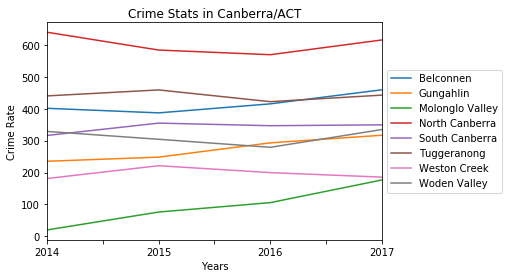

In [25]:
df_grouped.plot(kind='line')
plt.title('Crime Stats in Canberra/ACT')
plt.ylabel('Crime Rate')
plt.xlabel('Years')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**From graph it is evident that Molonglo Valley has lowest crime rate though crime rate shows increasing trend. Hence it is important to consider first three District so that we have range of dataset to play with. Based on crime rate, following districts can be considered for living:**

* Molonglo Valley
* Weston Creek
* Gungahlin

**Let's create a cluster of suburbs with its crime type to get better picture. Clustering should also align with above findings.**

**Drop the TINs as these are traffic infringement and not directly related to living**

In [26]:
new_df = sub_crime_df
new_df.drop('TINs Speeding',1,inplace=True)
new_df.drop('TINs Mobile Use',1,inplace=True)
new_df.drop('TINs Seatbelts',1,inplace=True)
new_df.drop('TINs Other',1,inplace=True)
new_df.head()

,District,Suburb,Homicide,Assault - FV,Assault - Non-FV,offences against a person,Robbery - armed,Robbery - other,Burglary dwellings,Burglary shops,Motor vehicle theft,Other offences,Theft (excluding Motor Vehicles),Sexual Assault,Burglary other,Property damage
0,Belconnen,ARANDA,0.000,1.1875,1.1250,0.1250,0.0625,0.0625,2.3125,0.0625,1.3125,21.6875,7.0000,0.0625,0.5625,4.8125
1,Belconnen,BELCONNEN,0.000,9.5625,20.7500,3.7500,1.5625,2.0625,12.5625,4.2500,12.3750,178.7500,169.3125,8.1250,5.9375,63.0625
2,Belconnen,BRUCE,0.125,1.6875,4.0000,0.5625,0.0625,0.3125,7.0000,1.0000,6.0000,36.9375,37.7500,1.8125,3.3750,21.6250
3,Belconnen,CHARNWOOD,0.000,3.3125,2.9375,0.3750,0.1250,0.2500,2.3125,0.8125,1.3125,26.8750,16.1875,0.4375,0.5000,11.9375
4,Belconnen,COOK,0.000,0.3750,0.5625,0.0000,0.1250,0.1250,2.7500,0.3750,1.3750,14.3750,7.0000,0.6250,0.0625,3.6875


In [27]:
#Drop Suburb and district in preparation for clustering
sub_crime_cluster_df = new_df.drop('Suburb', 1)
sub_crime_cluster_df.drop('District',1,inplace=True)

**Cluster Suburbs**

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

**Find optimal k using silhouette analysis**

In [29]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(sub_crime_cluster_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score (sub_crime_cluster_df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8059270373056381)
For n_clusters = 3, silhouette score is 0.7248836559334055)
For n_clusters = 4, silhouette score is 0.4880265143892487)
For n_clusters = 5, silhouette score is 0.48459968094922784)
For n_clusters = 6, silhouette score is 0.4470941592486707)
For n_clusters = 7, silhouette score is 0.38783547108510114)
For n_clusters = 8, silhouette score is 0.41027913578517594)
For n_clusters = 9, silhouette score is 0.3964910124510573)


**From above optimal value of k is 2 or 3. Let's use k=2**

In [30]:
# set number of clusters
kclusters = 2 

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sub_crime_cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**Insert cluster lables to suburb df**

In [31]:
#new_df.drop('Cluster Labels',1,inplace=True)
# add clustering labels
new_df.insert(0, 'Cluster Labels', kmeans.labels_)

new_df.head()

,Cluster Labels,District,Suburb,Homicide,Assault - FV,Assault - Non-FV,offences against a person,Robbery - armed,Robbery - other,Burglary dwellings,Burglary shops,Motor vehicle theft,Other offences,Theft (excluding Motor Vehicles),Sexual Assault,Burglary other,Property damage
0,0,Belconnen,ARANDA,0.000,1.1875,1.1250,0.1250,0.0625,0.0625,2.3125,0.0625,1.3125,21.6875,7.0000,0.0625,0.5625,4.8125
1,1,Belconnen,BELCONNEN,0.000,9.5625,20.7500,3.7500,1.5625,2.0625,12.5625,4.2500,12.3750,178.7500,169.3125,8.1250,5.9375,63.0625
2,0,Belconnen,BRUCE,0.125,1.6875,4.0000,0.5625,0.0625,0.3125,7.0000,1.0000,6.0000,36.9375,37.7500,1.8125,3.3750,21.6250
3,0,Belconnen,CHARNWOOD,0.000,3.3125,2.9375,0.3750,0.1250,0.2500,2.3125,0.8125,1.3125,26.8750,16.1875,0.4375,0.5000,11.9375
4,0,Belconnen,COOK,0.000,0.3750,0.5625,0.0000,0.1250,0.1250,2.7500,0.3750,1.3750,14.3750,7.0000,0.6250,0.0625,3.6875


**Merge with latitude and longitude so that we can visualize the clusters**

In [32]:
sub_crime_lat_long_df = pd.merge(new_df, latlon, on='Suburb', how='inner')
sub_crime_lat_long_df.head()

,Cluster Labels,District,Suburb,Homicide,Assault - FV,Assault - Non-FV,offences against a person,Robbery - armed,Robbery - other,Burglary dwellings,Burglary shops,Motor vehicle theft,Other offences,Theft (excluding Motor Vehicles),Sexual Assault,Burglary other,Property damage,Latitude,Longitude
0,0,Belconnen,ARANDA,0.000,1.1875,1.1250,0.1250,0.0625,0.0625,2.3125,0.0625,1.3125,21.6875,7.0000,0.0625,0.5625,4.8125,-35.258055,149.080426
1,1,Belconnen,BELCONNEN,0.000,9.5625,20.7500,3.7500,1.5625,2.0625,12.5625,4.2500,12.3750,178.7500,169.3125,8.1250,5.9375,63.0625,-35.227434,149.043145
2,0,Belconnen,BRUCE,0.125,1.6875,4.0000,0.5625,0.0625,0.3125,7.0000,1.0000,6.0000,36.9375,37.7500,1.8125,3.3750,21.6250,-35.245352,149.091633
3,0,Belconnen,CHARNWOOD,0.000,3.3125,2.9375,0.3750,0.1250,0.2500,2.3125,0.8125,1.3125,26.8750,16.1875,0.4375,0.5000,11.9375,-35.200178,149.034136
4,0,Belconnen,COOK,0.000,0.3750,0.5625,0.0000,0.1250,0.1250,2.7500,0.3750,1.3750,14.3750,7.0000,0.6250,0.0625,3.6875,-35.260103,149.066366


In [33]:
sub_crime_lat_long_df.shape

(119, 19)

**Create cluster map**

In [34]:
# create map
map_clusters = folium.Map(location=[location.latitude, location.longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sub_crime_lat_long_df['Latitude'], 
                                  sub_crime_lat_long_df['Longitude'], sub_crime_lat_long_df['Suburb'], 
                                  sub_crime_lat_long_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [35]:
sub_crime_lat_long_df.loc[sub_crime_lat_long_df['Cluster Labels'] == 0].head()

,Cluster Labels,District,Suburb,Homicide,Assault - FV,Assault - Non-FV,offences against a person,Robbery - armed,Robbery - other,Burglary dwellings,Burglary shops,Motor vehicle theft,Other offences,Theft (excluding Motor Vehicles),Sexual Assault,Burglary other,Property damage,Latitude,Longitude
0,0,Belconnen,ARANDA,0.0000,1.1875,1.1250,0.1250,0.0625,0.0625,2.3125,0.0625,1.3125,21.6875,7.0000,0.0625,0.5625,4.8125,-35.258055,149.080426
2,0,Belconnen,BRUCE,0.1250,1.6875,4.0000,0.5625,0.0625,0.3125,7.0000,1.0000,6.0000,36.9375,37.7500,1.8125,3.3750,21.6250,-35.245352,149.091633
3,0,Belconnen,CHARNWOOD,0.0000,3.3125,2.9375,0.3750,0.1250,0.2500,2.3125,0.8125,1.3125,26.8750,16.1875,0.4375,0.5000,11.9375,-35.200178,149.034136
4,0,Belconnen,COOK,0.0000,0.3750,0.5625,0.0000,0.1250,0.1250,2.7500,0.3750,1.3750,14.3750,7.0000,0.6250,0.0625,3.6875,-35.260103,149.066366
5,0,Belconnen,DUNLOP,0.0625,4.4375,3.1250,0.3125,0.1250,0.0625,3.4375,0.3125,2.1875,18.0625,14.5625,1.3750,0.0000,10.9375,-35.193997,149.019801


In [36]:
sub_crime_lat_long_df.loc[sub_crime_lat_long_df['Cluster Labels'] == 1]

,Cluster Labels,District,Suburb,Homicide,Assault - FV,Assault - Non-FV,offences against a person,Robbery - armed,Robbery - other,Burglary dwellings,Burglary shops,Motor vehicle theft,Other offences,Theft (excluding Motor Vehicles),Sexual Assault,Burglary other,Property damage,Latitude,Longitude
1,1,Belconnen,BELCONNEN,0.0000,9.5625,20.7500,3.7500,1.5625,2.0625,12.5625,4.2500,12.3750,178.7500,169.3125,8.1250,5.9375,63.0625,-35.227434,149.043145
31,1,Gungahlin,GUNGAHLIN,0.0000,6.3750,8.3750,1.0625,0.0000,0.6250,4.0625,1.3750,5.6875,74.2500,77.3125,2.0000,2.7500,19.3125,-35.178878,149.123653
70,1,North Canberra,BRADDON,0.0000,4.8125,9.1875,0.6875,1.5000,1.0625,11.8750,1.2500,9.5625,65.4375,83.5625,2.1250,5.0000,39.1250,-35.270815,149.135735
72,1,North Canberra,CITY,0.0000,6.6875,95.1875,3.8750,1.6250,4.0625,1.9375,3.3125,7.0625,318.2500,178.5625,8.6875,7.0625,43.6250,-35.488350,149.002694
99,1,Wooden Valley,PHILLIP,0.0625,3.3750,11.9375,1.6250,0.5000,1.1875,3.0625,3.6875,9.0625,94.9375,113.9375,3.5625,4.0000,40.5000,-35.347044,149.091009
110,1,Tuggeranong,GREENWAY,0.0000,4.1250,13.4375,2.1250,0.3750,0.7500,4.2500,2.2500,5.2500,81.2500,85.0625,4.3750,3.0000,27.0625,-35.415808,149.064815
112,1,Tuggeranong,KAMBAH,0.0625,14.6875,8.7500,1.5625,1.4375,0.5625,18.1250,2.0000,12.5000,105.9375,80.7500,5.3750,5.6875,45.9375,-35.386229,149.057967
118,1,Tuggeranong,WANNIASSA,0.0625,6.6875,9.6250,1.6875,0.8125,0.6875,7.5625,3.4375,6.5000,66.1250,74.6875,1.3750,2.8125,26.6875,-35.397664,149.090804


**Cluster analysis**

* Cluster 0 - High in crimes
* Cluster 1 - Low in crimes 

**From earlier district wise line plot, we identifed Molonglo Valley, Gungahlin and Weston Creek. Above analysis also shows these districts has less crime.**

**Let's use Foursquare API to check different Venues**

In [37]:
cluster0_suburbs = sub_crime_lat_long_df.loc[(sub_crime_lat_long_df['Cluster Labels'] == 0) & 
                                             (sub_crime_lat_long_df['District'].isin(['Weston Creek','Molonglo Valley','Gungahlin']))] 
top_Districts = cluster0_suburbs[['District','Suburb','Latitude','Longitude']]
top_Districts.head()

,District,Suburb,Latitude,Longitude
25,Gungahlin,AMAROO,-35.169587,149.128021
26,Gungahlin,BONNER,-35.155962,149.142956
27,Gungahlin,CASEY,-35.167001,149.094715
28,Gungahlin,CRACE,-35.202880,149.107474
29,Gungahlin,FORDE,-35.168224,149.146069


**FourSquare API credentials**

In [97]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


**Search Suburbs for shops**

In [39]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [40]:
# define function to return result for each Suburb in selected three districts
LIMIT = 20

def getCategories(districts, suburbs, latitudes, longitudes,  radius=1500):
    #Create empty dataframe to store the results
    column_names = ['District','Suburb','name', 'categories','location.lat','location.lng']

    # instantiate the dataframe
    categories = pd.DataFrame(columns=column_names)
   
    venues_list=[]
    filtered_venue_col = ['name', 'categories','location.lat','location.lng']
    
    for district,name, lat, lng in zip(districts, suburbs, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']#['groups'][0]['items']
        #print(results)
        #venues = results['venues']
        nearby_venues = json_normalize(results)
        filtered_venue = nearby_venues.loc[:, filtered_venue_col]
        filtered_venue['categories'] = filtered_venue.apply(get_category_type, axis=1)
        filtered_venue['Suburb'] = name
        filtered_venue['District'] = district
        #print(filtered_venue.head())
        categories = pd.concat([categories, filtered_venue], ignore_index=True,sort=False)
    return(categories)

In [41]:
dt_category_results = getCategories(districts=top_Districts['District'],suburbs=top_Districts['Suburb'],
                                   latitudes=top_Districts['Latitude'],
                                   longitudes=top_Districts['Longitude']
                                  )
dt_category_results.head()

,District,Suburb,name,categories,location.lat,location.lng
0,Gungahlin,AMAROO,Woolworths,Grocery Store,-35.161448,149.139117
1,Gungahlin,AMAROO,Amaroo,Neighborhood,-35.168200,149.128279
2,Gungahlin,AMAROO,The G Spot,Food Truck,-35.168809,149.120172
3,Gungahlin,AMAROO,Coles,Grocery Store,-35.164640,149.132171
4,Gungahlin,AMAROO,Amaroo Shops,Shopping Plaza,-35.164611,149.131703


In [42]:
dt_category_results.groupby('Suburb').count()
dt_category_results.drop('District',axis=1,inplace=True)

In [43]:
print('There are {} uniques categories.'.format(len(dt_category_results['categories'].unique())))

There are 123 uniques categories.


**Analyze suburbs**

In [63]:
# one hot encoding
gmw_onehot = pd.get_dummies(dt_category_results[['categories']], prefix="", prefix_sep="")

# add suburb column back to dataframe
gmw_onehot['Suburb'] = dt_category_results['Suburb'] 

#Move the suburb column to front
cols = gmw_onehot.columns.tolist()
cols.insert(0, cols.pop(cols.index('Suburb')))
gmw_onehot = gmw_onehot.reindex(columns= cols)

gmw_onehot.head()

,Suburb,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,Bakery,Bar,Baseball Field,Board Shop,Brewery,Bridge,Buddhist Temple,Building,Bus Line,Bus Station,Bus Stop,Café,Cemetery,Chiropractor,Church,Clothing Store,Coffee Shop,College Academic Building,College Administrative Building,College Auditorium,College Communications Building,College Gym,College Math Building,College Rec Center,Community College,Convention Center,Cosmetics Shop,Coworking Space,Diner,Doctor's Office,Dog Run,Elementary School,Event Space,Fast Food Restaurant,Field,Financial or Legal Service,Fire Station,Fish & Chips Shop,Flower Shop,Food Truck,Forest,Furniture / Home Store,Garden,Gas Station,Gastropub,General College & University,General Entertainment,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,High School,Hotel,Housing Development,Ice Cream Shop,Indian Restaurant,Industrial Estate,Lake,Laundry Service,Library,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Miscellaneous Shop,Monument / Landmark,Motorcycle Shop,Mountain,Museum,Music School,Music Store,Nature Preserve,Neighborhood,Non-Profit,Office,Other Great Outdoors,Outdoor Sculpture,Paper / Office Supplies Store,Park,Parking,Planetarium,Playground,Plaza,Police Station,Post Office,Professional & Other Places,Radio Station,Rental Car Location,Residential Building (Apartment / Condo),Rugby Pitch,Salon / Barbershop,Scenic Lookout,School,Shopping Mall,Shopping Plaza,Soccer Field,Social Club,Spa,Sporting Goods Shop,Sports Club,Student Center,Supermarket,Thai Restaurant,Thrift / Vintage Store,Tourist Information Center,Track,Trade School,Trail,Veterinarian,Voting Booth,Winery
0,AMAROO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AMAROO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AMAROO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AMAROO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,AMAROO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Sum the categories based on suburb to get frequency**

In [64]:
gmw_onehot = gmw_onehot.groupby('Suburb').sum().reset_index()
gmw_onehot.head()

,Suburb,Asian Restaurant,Athletics & Sports,Australian Restaurant,Automotive Shop,Bakery,Bar,Baseball Field,Board Shop,Brewery,Bridge,Buddhist Temple,Building,Bus Line,Bus Station,Bus Stop,Café,Cemetery,Chiropractor,Church,Clothing Store,Coffee Shop,College Academic Building,College Administrative Building,College Auditorium,College Communications Building,College Gym,College Math Building,College Rec Center,Community College,Convention Center,Cosmetics Shop,Coworking Space,Diner,Doctor's Office,Dog Run,Elementary School,Event Space,Fast Food Restaurant,Field,Financial or Legal Service,Fire Station,Fish & Chips Shop,Flower Shop,Food Truck,Forest,Furniture / Home Store,Garden,Gas Station,Gastropub,General College & University,General Entertainment,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,High School,Hotel,Housing Development,Ice Cream Shop,Indian Restaurant,Industrial Estate,Lake,Laundry Service,Library,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Miscellaneous Shop,Monument / Landmark,Motorcycle Shop,Mountain,Museum,Music School,Music Store,Nature Preserve,Neighborhood,Non-Profit,Office,Other Great Outdoors,Outdoor Sculpture,Paper / Office Supplies Store,Park,Parking,Planetarium,Playground,Plaza,Police Station,Post Office,Professional & Other Places,Radio Station,Rental Car Location,Residential Building (Apartment / Condo),Rugby Pitch,Salon / Barbershop,Scenic Lookout,School,Shopping Mall,Shopping Plaza,Soccer Field,Social Club,Spa,Sporting Goods Shop,Sports Club,Student Center,Supermarket,Thai Restaurant,Thrift / Vintage Store,Tourist Information Center,Track,Trade School,Trail,Veterinarian,Voting Booth,Winery
0,AMAROO,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,BONNER,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,CASEY,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,CHAPMAN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,COOMBS,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**Drop the unwanted columns as we are determining which suburb is good for living. Below are removed as they are not required for daily living.**

In [65]:
unwanted_col_list=['Automotive Shop','Baseball Field','Board Shop','Brewery','Bridge','Building','Cemetery',
                    'Clothing Store','Cosmetics Shop','Event Space','Field',
                    'Forest','Furniture / Home Store','Garden','Gastropub','Government Building',
                    'Hardware Store','Hotel','Industrial Estate','Massage Studio','Motorcycle Shop','Music Store',
                    'Nature Preserve','Planetarium','Professional & Other Places','Radio Station',
                    'Rugby Pitch','Salon / Barbershop','Scenic Lookout','Soccer Field','Social Club','Spa','Sporting Goods Shop',
                    'Thrift / Vintage Store','Voting Booth','Financial or Legal Service',
                    'Martial Arts Dojo','Paper / Office Supplies Store','Office','Non-Profit',
                    'Residential Building (Apartment / Condo)','Housing Development','Health & Beauty Service','Laundry Service',
                    'Coworking Space','Gas Station','Rental Car Location','Tourist Information Center','Dog Run',
                    'Veterinarian','Fire Station','Police Station','Post Office','Parking','Winery'
                   ]
required_cols_gmw = gmw_onehot.drop(unwanted_col_list,axis=1)
required_cols_gmw.head()

,Suburb,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Bar,Buddhist Temple,Bus Line,Bus Station,Bus Stop,Café,Chiropractor,Church,Coffee Shop,College Academic Building,College Administrative Building,College Auditorium,College Communications Building,College Gym,College Math Building,College Rec Center,Community College,Convention Center,Diner,Doctor's Office,Elementary School,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food Truck,General College & University,General Entertainment,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,High School,Ice Cream Shop,Indian Restaurant,Lake,Library,Liquor Store,Malay Restaurant,Market,Medical Center,Medical Supply Store,Miscellaneous Shop,Monument / Landmark,Mountain,Museum,Music School,Neighborhood,Other Great Outdoors,Outdoor Sculpture,Park,Playground,Plaza,School,Shopping Mall,Shopping Plaza,Sports Club,Student Center,Supermarket,Thai Restaurant,Track,Trade School,Trail
0,AMAROO,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,BONNER,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,CASEY,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,CHAPMAN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,COOMBS,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1



**Sum up based on the categories**

In [66]:
restuarants_col_list=['Asian Restaurant','Australian Restaurant','Diner','Fast Food Restaurant','Fish & Chips Shop','Food Truck',
                     'Greek Restaurant','Ice Cream Shop','Malay Restaurant','Thai Restaurant',
                     'Indian Restaurant'
                     ]
required_cols_gmw['Restuarants'] = required_cols_gmw[restuarants_col_list].sum(axis=1)

transport_cols_list=['Bus Line','Bus Station','Bus Stop']
required_cols_gmw['Transport'] = required_cols_gmw[transport_cols_list].sum(axis=1)


clinic_cols_list=['Doctor\'s Office','Chiropractor']
required_cols_gmw['Clinics'] = required_cols_gmw[clinic_cols_list].sum(axis=1)


edu_cols_list=['College Academic Building','College Administrative Building','College Auditorium',
               'College Communications Building','College Math Building','Elementary School',
               'High School','School','Trade School','Student Center','General College & University','Community College']
required_cols_gmw['Education'] = required_cols_gmw[edu_cols_list].sum(axis=1)


cafe_cols_list=['Café','Coffee Shop']
required_cols_gmw['Cafes'] = required_cols_gmw[cafe_cols_list].sum(axis=1)


grocery_shopping_cols_list=['Bakery','Convention Center','Flower Shop','Grocery Store','Grocery Store','Market','Miscellaneous Shop',
                    'Shopping Plaza','Shopping Mall','Supermarket','Plaza']
required_cols_gmw['Grocery_shopping'] = required_cols_gmw[grocery_shopping_cols_list].sum(axis=1)

pharm_cols_list=['Medical Center','Medical Supply Store']
required_cols_gmw['Pharmacy']= required_cols_gmw[pharm_cols_list].sum(axis=1)

play_parks_cols_list=['General Entertainment','Park','Playground','Other Great Outdoors','Library','Music School']
required_cols_gmw['Play_Parks']= required_cols_gmw[play_parks_cols_list].sum(axis=1)

gym_sports_cols_list =['Athletics & Sports','College Gym','College Rec Center','Gym',
                       'Gym Pool','Track','Trail','Gym / Fitness Center','Sports Club']
required_cols_gmw['Gym_Sports']= required_cols_gmw[gym_sports_cols_list].sum(axis=1)

attractions_cols_list =['Lake','Monument / Landmark','Mountain','Museum','Outdoor Sculpture']
required_cols_gmw['Attractions']= required_cols_gmw[attractions_cols_list].sum(axis=1)

bar_liquor_cols_list = ['Bar','Liquor Store']
required_cols_gmw['Bar_liquor']= required_cols_gmw[bar_liquor_cols_list].sum(axis=1)

religious_cols_list = ['Buddhist Temple','Church']
required_cols_gmw['Religious_space']= required_cols_gmw[religious_cols_list].sum(axis=1)

#pet_friendly_cols_list = ['Dog Run','Veterinarian']
#required_cols_gmw['Pet_Friendly']= required_cols_gmw[pet_friendly_cols_list].sum(axis=1)

merged_list = restuarants_col_list + transport_cols_list + clinic_cols_list + edu_cols_list + cafe_cols_list \
+ grocery_shopping_cols_list + pharm_cols_list + play_parks_cols_list + gym_sports_cols_list + attractions_cols_list \
+ bar_liquor_cols_list + religious_cols_list

required_cols_gmw.drop(merged_list,axis=1,inplace=True)

required_cols_gmw.head()


#required_cols_gmw['Restuarants'] = required_cols_gmw[]+required_cols_gmw[]+required_cols_gmw[]+required_cols_gmw[]+required_cols_gmw[]+
#required_cols_gmw[]+required_cols_gmw[]+required_cols_gmw[]+required_cols_gmw[]+

,Suburb,Neighborhood,Restuarants,Transport,Clinics,Education,Cafes,Grocery_shopping,Pharmacy,Play_Parks,Gym_Sports,Attractions,Bar_liquor,Religious_space
0,AMAROO,3,1,0,0,3,0,5,0,1,3,0,1,1
1,BONNER,2,1,0,3,4,0,3,0,2,1,0,0,1
2,CASEY,2,1,0,1,3,0,1,0,1,1,1,0,0
3,CHAPMAN,1,1,0,1,1,0,6,0,2,1,0,0,0
4,COOMBS,3,0,0,0,5,0,1,0,3,2,0,0,0


**Drop suburb to plot Dendrogram**

In [67]:
dropped_sub_df = required_cols_gmw.drop('Suburb',axis=1)
dropped_sub_df.head()

,Neighborhood,Restuarants,Transport,Clinics,Education,Cafes,Grocery_shopping,Pharmacy,Play_Parks,Gym_Sports,Attractions,Bar_liquor,Religious_space
0,3,1,0,0,3,0,5,0,1,3,0,1,1
1,2,1,0,3,4,0,3,0,2,1,0,0,1
2,2,1,0,1,3,0,1,0,1,1,1,0,0
3,1,1,0,1,1,0,6,0,2,1,0,0,0
4,3,0,0,0,5,0,1,0,3,2,0,0,0


**Normalize the data. Though variations are not high, still there are values with 0. Hence it is good to normalize**

In [68]:
from sklearn.preprocessing import MinMaxScaler
x = dropped_sub_df.values.astype(float) #returns a numpy array df['colname'] = df['colname'].astype(float)
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.75      , 0.25      , 0.        , 0.        , 0.6       ,
        0.        , 0.71428571, 0.        , 0.33333333, 1.        ,
        0.        , 0.5       , 0.33333333],
       [0.5       , 0.25      , 0.        , 1.        , 0.8       ,
        0.        , 0.42857143, 0.        , 0.66666667, 0.33333333,
        0.        , 0.        , 0.33333333],
       [0.5       , 0.25      , 0.        , 0.33333333, 0.6       ,
        0.        , 0.14285714, 0.        , 0.33333333, 0.33333333,
        1.        , 0.        , 0.        ],
       [0.25      , 0.25      , 0.        , 0.33333333, 0.2       ,
        0.        , 0.85714286, 0.        , 0.66666667, 0.33333333,
        0.        , 0.        , 0.        ],
       [0.75      , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.14285714, 0.        , 1.        , 0.66666667,
        0.        , 0.        , 0.        ]])

**Calculate data point distance**

In [69]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

**Perform linkage to measure distance between data points**

In [72]:
import pylab
from scipy.cluster import hierarchy 
Z = hierarchy.linkage(D, 'complete')

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


**Plot Dendrogram**

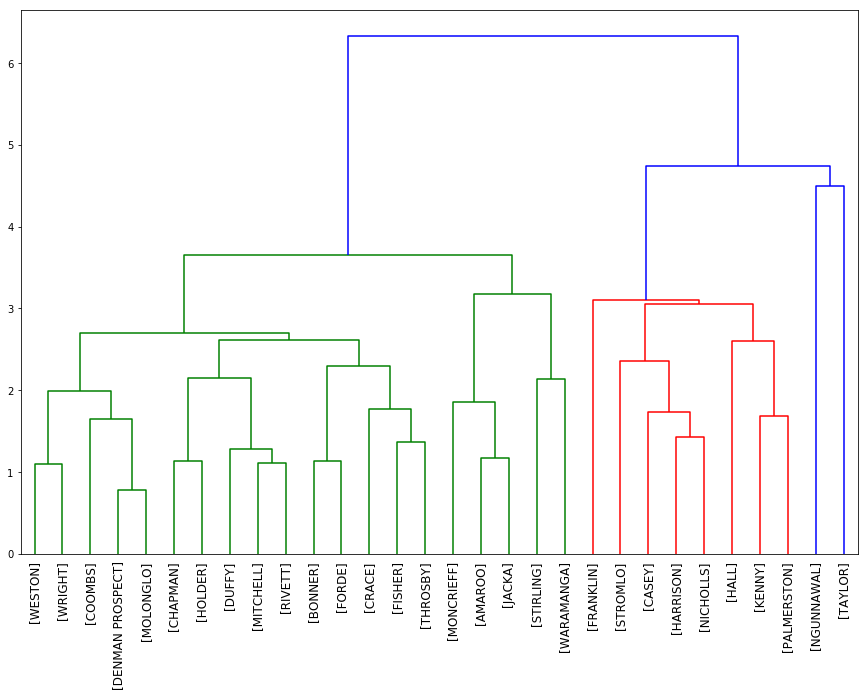

In [73]:
fig = pylab.figure(figsize=(15,10))
def llf(id):
    return '[%s]' % (required_cols_gmw['Suburb'][id] )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=90, leaf_font_size =12)

In [74]:
from scipy.spatial import distance_matrix
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix[0:5])

[[0.         1.41056308 1.51845226 1.2075537  1.21065985 1.38070811
  1.24727594 1.15833027 1.28230589 1.34683007 1.88047161 1.7169688
  1.70275387 1.25774021 0.56368765 1.87598198 1.44892055 1.10560569
  0.95200588 2.12573317 1.44941344 1.96630488 1.42350092 1.67545472
  1.64160408 1.66088453 1.47485731 1.38132384 1.19742022 1.03084515]
 [1.41056308 0.         1.33727309 1.07783534 1.25696698 1.1335784
  1.16522262 1.1425446  1.14198628 0.53319514 1.82752636 1.80909926
  1.76833447 1.42609706 1.16297033 1.81772733 1.43519496 1.11652705
  1.33647801 2.29579745 1.68539478 1.84044077 1.30660714 1.26240781
  1.51976584 1.86980573 1.02553841 1.42105962 1.34940568 1.19755278]
 [1.51845226 1.33727309 0.         1.35787157 1.39702064 1.34245604
  1.41911553 1.2323723  1.10164019 1.24359128 1.02299525 1.60506744
  0.80785542 1.53395802 1.39631236 1.10164019 1.31439354 1.29636243
  1.51606851 1.72644661 0.83131047 1.32747437 1.30382744 1.65977487
  0.8976822  1.98203525 1.1232974  1.64312627 1.

**Perform Agglomerative clustering**

In [82]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0,
       2, 2, 0, 1, 2, 2, 1, 1])

**Join labels with suburb**

In [90]:
required_cols_gmw['cluster_'] = agglom.labels_
required_cols_gmw.head()

,Suburb,Neighborhood,Restuarants,Transport,Clinics,Education,Cafes,Grocery_shopping,Pharmacy,Play_Parks,Gym_Sports,Attractions,Bar_liquor,Religious_space,cluster_
0,AMAROO,3,1,0,0,3,0,5,0,1,3,0,1,1,1
1,BONNER,2,1,0,3,4,0,3,0,2,1,0,0,1,2
2,CASEY,2,1,0,1,3,0,1,0,1,1,1,0,0,0
3,CHAPMAN,1,1,0,1,1,0,6,0,2,1,0,0,0,2
4,COOMBS,3,0,0,0,5,0,1,0,3,2,0,0,0,1


**Cluster 0**

In [91]:
required_cols_gmw.loc[required_cols_gmw['cluster_'] == 0]

,Suburb,Neighborhood,Restuarants,Transport,Clinics,Education,Cafes,Grocery_shopping,Pharmacy,Play_Parks,Gym_Sports,Attractions,Bar_liquor,Religious_space,cluster_
2,CASEY,2,1,0,1,3,0,1,0,1,1,1,0,0,0
10,FRANKLIN,1,4,1,0,4,0,2,0,0,0,1,0,0,0
11,HALL,1,1,0,0,1,1,0,1,0,1,0,0,0,0
12,HARRISON,2,3,2,0,1,0,0,0,1,1,1,0,0,0
15,KENNY,2,0,0,1,2,0,1,1,0,1,1,0,0,0
19,NGUNNAWAL,2,0,6,0,2,1,4,1,0,0,1,1,0,0
20,NICHOLLS,3,2,0,0,2,1,3,0,0,1,1,0,1,0
21,PALMERSTON,1,0,2,0,3,0,3,1,2,0,1,0,1,0
24,STROMLO,0,0,0,1,1,0,1,0,2,2,1,0,1,0


**Cluster 1**

In [92]:
required_cols_gmw.loc[required_cols_gmw['cluster_'] == 1]

,Suburb,Neighborhood,Restuarants,Transport,Clinics,Education,Cafes,Grocery_shopping,Pharmacy,Play_Parks,Gym_Sports,Attractions,Bar_liquor,Religious_space,cluster_
0,AMAROO,3,1,0,0,3,0,5,0,1,3,0,1,1,1
4,COOMBS,3,0,0,0,5,0,1,0,3,2,0,0,0,1
6,DENMAN PROSPECT,1,0,0,1,3,0,1,0,3,3,0,0,0,1
14,JACKA,2,0,0,1,3,0,3,0,1,3,0,1,1,1
17,MOLONGLO,1,0,0,1,3,0,1,0,2,3,0,0,0,1
18,MONCRIEFF,4,0,0,1,5,0,0,0,1,3,0,1,1,1
25,TAYLOR,0,0,0,1,4,3,0,0,2,3,0,2,0,1
28,WESTON,1,0,1,0,3,1,0,0,1,2,0,0,0,1
29,WRIGHT,2,0,1,0,3,0,1,0,2,2,0,0,0,1


**Cluster 2**

In [93]:
required_cols_gmw.loc[required_cols_gmw['cluster_'] == 2]

,Suburb,Neighborhood,Restuarants,Transport,Clinics,Education,Cafes,Grocery_shopping,Pharmacy,Play_Parks,Gym_Sports,Attractions,Bar_liquor,Religious_space,cluster_
1,BONNER,2,1,0,3,4,0,3,0,2,1,0,0,1,2
3,CHAPMAN,1,1,0,1,1,0,6,0,2,1,0,0,0,2
5,CRACE,1,2,0,1,2,2,3,0,2,1,0,0,0,2
7,DUFFY,1,0,0,0,2,0,2,0,2,1,0,0,1,2
8,FISHER,1,1,0,1,2,0,1,0,0,1,0,0,0,2
9,FORDE,1,2,1,2,4,0,2,0,2,1,0,0,1,2
13,HOLDER,1,0,2,0,1,0,7,0,2,1,0,0,0,2
16,MITCHELL,1,0,0,0,0,0,0,0,2,1,0,0,0,2
22,RIVETT,1,0,0,0,1,0,3,0,2,0,0,0,0,2
23,STIRLING,0,1,0,1,2,0,0,0,3,1,0,0,3,2


**Observations from Cluster**

* Cluster 0 - Education, restaurants, grocers & shopping, attractions, transport
* Cluster 1 - Education, grocers & shopping, playground & parks, gym & sports
* Cluster 2 - Education, restaurants, clinics, grocers & shopping, playground & parks

**Plot the clusters**

In [95]:
gmw_lat_long_df = pd.merge(required_cols_gmw, latlon, on='Suburb', how='inner')
gmw_lat_long_df.head()

,Suburb,Neighborhood,Restuarants,Transport,Clinics,Education,Cafes,Grocery_shopping,Pharmacy,Play_Parks,Gym_Sports,Attractions,Bar_liquor,Religious_space,cluster_,Latitude,Longitude
0,AMAROO,3,1,0,0,3,0,5,0,1,3,0,1,1,1,-35.169587,149.128021
1,BONNER,2,1,0,3,4,0,3,0,2,1,0,0,1,2,-35.155962,149.142956
2,CASEY,2,1,0,1,3,0,1,0,1,1,1,0,0,0,-35.167001,149.094715
3,CHAPMAN,1,1,0,1,1,0,6,0,2,1,0,0,0,2,-35.356209,149.037454
4,COOMBS,3,0,0,0,5,0,1,0,3,2,0,0,0,1,-35.316734,149.042525


In [96]:
# create map
map_clusters = folium.Map(location=[location.latitude, location.longitude], zoom_start=11)
noOfclusters=3

# set color scheme for the clusters
x = np.arange(noOfclusters)
ys = [i + x + (i*x)**2 for i in range(noOfclusters)]
colors_array_hc = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors1.rgb2hex(i) for i in colors_array_hc]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gmw_lat_long_df['Latitude'], gmw_lat_long_df['Longitude'], gmw_lat_long_df['Suburb'], gmw_lat_long_df['cluster_']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters